# Integración de ecuaciones hidrostaticas en RG y Newton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import astropy.constants as const

## Newtonian

In [2]:
# Constants and parameters
G = const.G.value
M = const.M_sun.value
R = const.R_sun.value
c = const.c.value
rho_0 = 1.5e5
P_0 = 2.5e16

k = 1
gamma = 2

a = rho_0*R**3/M
b = rho_0/P_0*M/R
l = M/R
mu = rho_0**gamma/P_0*k

In [3]:
# Define the ODEs
def NewtOdes(x, r):
    # Constants
    G = const.G.value
    M = const.M_sun.value
    R = const.R_sun.value
    c = const.c.value
    rho_0 = 1.5e5
    P_0 = 2.5e16

    k = 2
    gamma = 2

    # a = rho_0*R**3/M
    # b = rho_0/P_0*M/R
    # l = M/R
    # mu = rho_0**gamma/P_0*k
    a = 1
    b = 1
    l = 1
    mu = 1


    # Variables
    rho = x[0]
    m = x[1]
    phi = x[2]

    # ODEs
    # drho_dr = -b/mu/gamma * G*rho**(2-gamma)*m/r**2
    # dm_dr = 4*np.pi*a*r**2*rho
    # dphi_dr = l*G/c**2*m/r**2
    drho_dr = -1/gamma * rho**(2-gamma)*m/r**2
    dm_dr = r**2*rho
    dphi_dr = l*m/r**2

    return [drho_dr, dm_dr, dphi_dr]

In [4]:
# initial conditions
rho_0 = 1.5e5
m_0 = 0
phi_0 = 0
x_0 = [rho_0, m_0, phi_0]

# integration range
r = np.linspace(1e-5, 5, 1000)

# solve ODE
x = odeint(NewtOdes, x_0, r)

4.444445555555556 -52.73490137418116


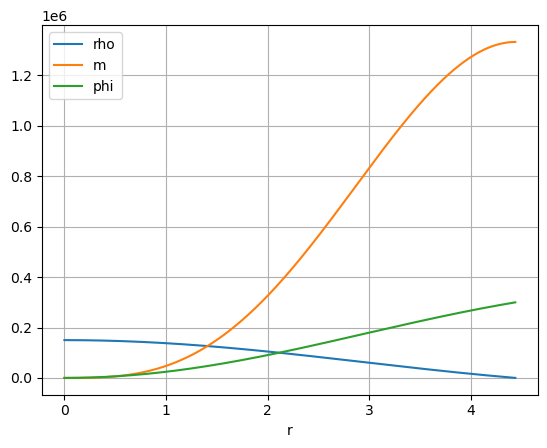

In [5]:
# search the x where rho = 0
for i in range(len(x[:,0])):
    if x[i,0] < 0:
        print(r[i], x[i,0])
        lim = i
        break

# plot
plt.plot(r[:lim], x[:lim,0], label='rho')
plt.plot(r[:lim], x[:lim,1], label='m')
plt.plot(r[:lim], x[:lim,2], label='phi')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
# plt.plot(r, x[:,0], label='rho')
# plt.plot(r, x[:,1], label='m')
# plt.plot(r, x[:,2], label='phi')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
plt.xlabel('r')
plt.legend()
plt.grid()
plt.show()

## Relativistic

In [10]:
# Define the ODEs
def RelOdes(x, r):
    # Constants
    G = const.G.value
    M = const.M_sun.value
    R = const.R_sun.value
    c = const.c.value
    rho_0 = 1.5e5
    P_0 = 2.5e16

    k = 1
    gamma = 2

    # a = 4*np.pi*rho_0*R**3/M
    # d = P_0/c**2/rho_0
    # l = G/c**2*M/R
    # mu = rho_0**gamma/P_0*k
    a = 1
    d = 1
    l = 1
    mu = 1

    # Variables
    rho = x[0]
    m = x[1]
    phi = x[2]

    # ODEs
    drho_dr = -l/d/mu/gamma * rho**(2-gamma)*m/r**2 * (1 + mu*d*rho**(gamma-1)) * (1 + mu/m*a*d*rho**gamma*r**3) / (1 - 2*l*m/r)
    dm_dr = a*r**2*rho
    dphi_dr = l*m/r**2 * (1 + mu/m*a*d*rho**gamma*r**3) / (1 - 2*l*m/r)
    return [drho_dr, dm_dr, dphi_dr]

In [13]:
# initial conditions
rho_0 = 1
m_0 = 4*np.pi/3*(1e-5)**3*rho_0
phi_0 = 0
x_0 = [rho_0, m_0, phi_0]

# integration range
r = np.linspace(1e-5, 5, 1000)

# solve ODE
x = odeint(RelOdes, x_0, r)

c:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


0.005014994994994995 -0.013380615800487114


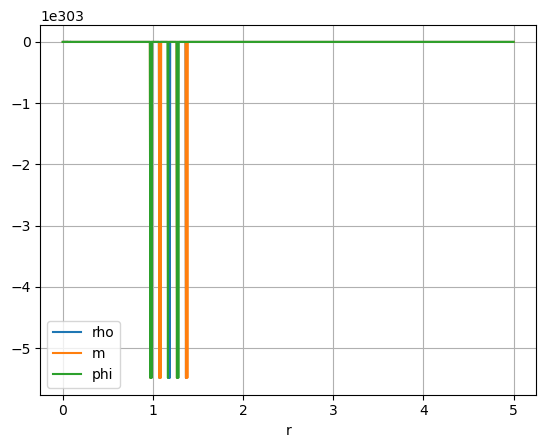

In [14]:
# search the x where rho = 0
for i in range(len(x[:,0])):
    if x[i,0] < 0:
        print(r[i], x[i,0])
        lim = i
        break

# plot
# plt.plot(r[:lim], x[:lim,0], label='rho')
# plt.plot(r[:lim], x[:lim,1], label='m')
# plt.plot(r[:lim], x[:lim,2], label='phi')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
plt.plot(r, x[:,0], label='rho')
plt.plot(r, x[:,1], label='m')
plt.plot(r, x[:,2], label='phi')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
plt.xlabel('r')
plt.legend()
plt.grid()
plt.show()